#**Assignment on Classification**

Do the following in the iris dataset
1. Read the dataset to python environment
2. Do the necessary pre-processing steps
3. Find out which classification model gives the best result (try all the
classification algorithms discussed in the session)

**Import libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Read the dataset to python environment**

In [2]:
data=pd.read_excel("/content/iris.xls")
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


**Exploratory Data Analysis**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [5]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
data['Classification'].nunique()
data['Classification'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Classification, dtype: int64

###**Preprocessing**

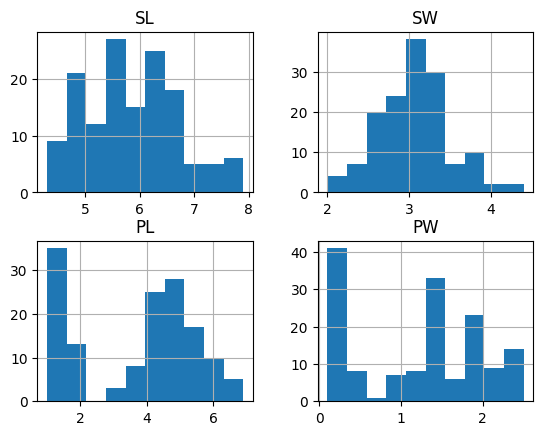

In [7]:
data.hist();

In [8]:
#Check for skewness

num_cols=[['SL','PL','PW','SW']]
for i in num_cols:
  print(data[i].skew())

SL    0.306823
PL   -0.268905
PW   -0.104997
SW    0.377818
dtype: float64


**(i). Handling missing values**

In [9]:
# when we check for mean and median of SL & SW its almost same(see data.describe())

data['SL']=data['SL'].fillna(data['SL'].mean())
data['SW']=data['SW'].fillna(data['SW'].mean())

data['PL']=data['PL'].fillna(data['PL'].median())

In [10]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

**(ii). Outlier detection and Handling**

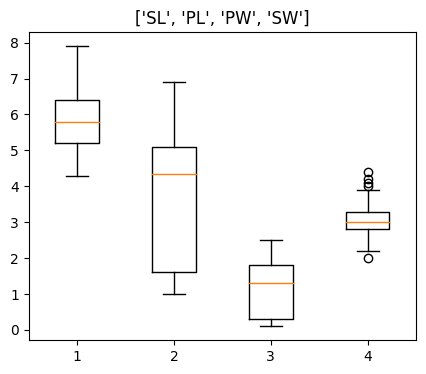

In [11]:
for i in num_cols:
  plt.figure(figsize=(5,4))
  plt.boxplot(data[i])
  plt.title(i)


In [12]:
Q1=np.percentile(data['SW'],25,method='midpoint')
Q3=np.percentile(data['SW'],75,method='midpoint')

IQR=Q3-Q1

low=Q1-1.5*IQR
up=Q3+1.5*IQR

outlier=[]
for x in data['SW']:
  if ((x<low) or (x>up)):
    outlier.append(x)

print(outlier)

[4.0, 4.4, 4.1, 4.2, 2.0]


In [13]:
data['SW']=data['SW'].clip(lower=low,upper=up)

In [14]:
# Check whether outliers are fixed or not

outlier=[]
for x in data['SW']:
  if ((x<low) or (x>up)):
    outlier.append(x)

print(outlier)

[]


**Pair plot**

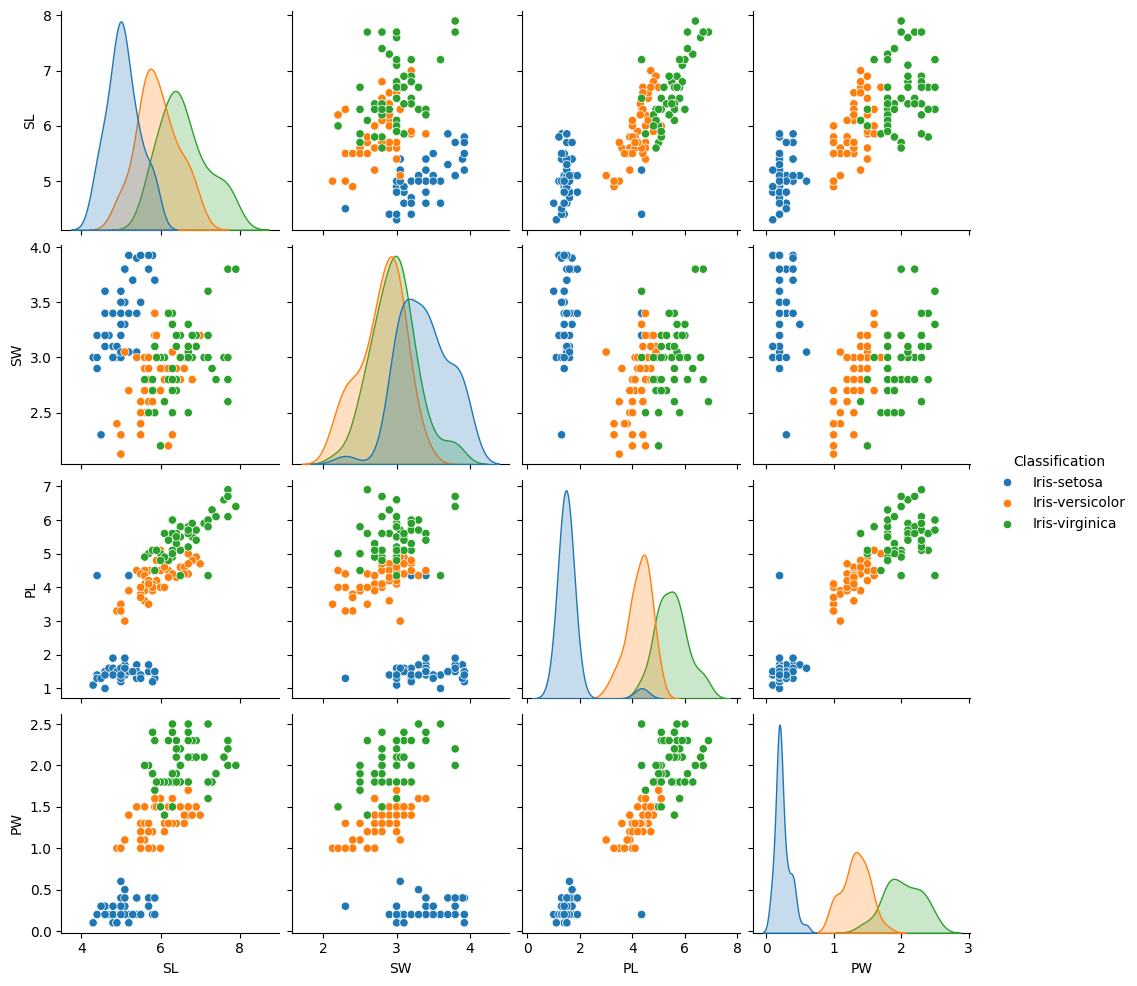

In [15]:
sns.pairplot(data, hue='Classification')
plt.show()

Pair plot is a way to explore the relationships between different features and how they vary across species of classification.

Pair plot  will generate a grid of scatter plots, where each plot represents the relationship between two features in the Iris dataset.

The graph shows that PL and PW overlap the least, making separation easy.

**Correlation**

<ipython-input-16-f6617694f4b0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()
<ipython-input-16-f6617694f4b0>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True,cmap='Set3')


<Axes: >

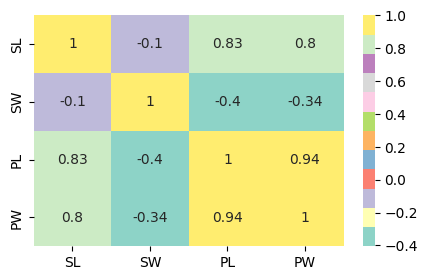

In [16]:
data.corr()
plt.figure(figsize=(5,3))
sns.heatmap(data.corr(),annot=True,cmap='Set3')


**Label Encoding**

In [17]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

data['Classification']=le.fit_transform(data['Classification'])
data.head()

,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.4,0.2,0
1,4.900000,3.0,1.4,0.2,0
2,5.855944,3.2,1.3,0.2,0
3,4.600000,3.1,1.5,0.2,0
4,5.000000,3.6,1.4,0.2,0


##**Model Building**

**Split data**

In [18]:
y=data['Classification']
X=data.drop('Classification',axis=1)

**Standard Scaling**

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_scaled=sc.fit_transform(X)


In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.20,random_state=42)

**1.Logistic Regression**

In [21]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()

In [22]:
log_reg.fit(X_train,y_train)

LogisticRegression()

In [23]:
log_pred=log_reg.predict(X_test)
log_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 2, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [24]:
# Check the accuracy

from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score

print("Accuracy is:",accuracy_score(y_test,log_pred))

print('Precision:',precision_score(y_test,log_pred,average='micro'))
print('recall:',recall_score(y_test,log_pred,average='micro'))
print('F1:',f1_score(y_test,log_pred,average='micro'))


Accuracy is: 0.9666666666666667
Precision: 0.9666666666666667
recall: 0.9666666666666667
F1: 0.9666666666666667


**2. KNN**

In [25]:
from sklearn.neighbors import KNeighborsClassifier
metric_k=[]
neighbours=np.arange(3,11)

for k in neighbours:
  knn_model=KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
  knn_model.fit(X_train,y_train)
  knn_pred=knn_model.predict(X_test)
  accuracy=accuracy_score(y_test,knn_pred)
  metric_k.append(accuracy)

Text(0, 0.5, 'Metric K')

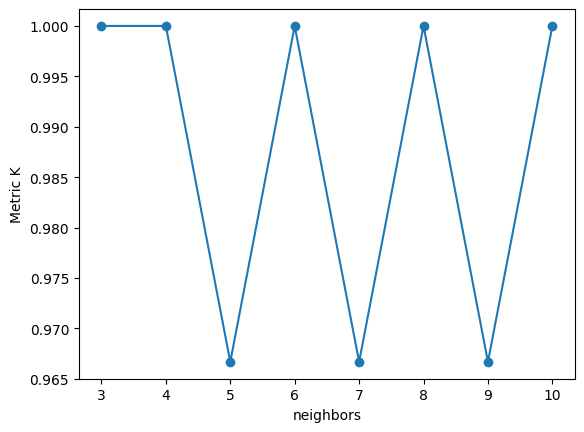

In [26]:
plt.plot(neighbours,metric_k,'o-')
plt.xlabel('neighbors')
plt.ylabel('Metric K')

In [27]:
classifier=KNeighborsClassifier(n_neighbors=6,metric='minkowski',p=2)
classifier.fit(X_train,y_train)
knn_pred=classifier.predict(X_test)

In [28]:
#Check for accuracy

print("Accuracy is:",accuracy_score(y_test,knn_pred))

Accuracy is: 1.0


**3. SVM**

In [29]:
from sklearn.svm import SVC
sv_model=SVC()

In [30]:
sv_model.fit(X_train,y_train)
sv_pred=sv_model.predict(X_test)

In [31]:
# check for Accuracy
print("Accuracy is: ",accuracy_score(y_test,sv_pred))

Accuracy is:  1.0


In [32]:
# from sklearn.svm import SVC
# sv_model=SVC(kernel='rbf')

**Note:**

For decision tree and random forest, we are going to use X (independednt features) without scaling.

Because , for tree-based algorithms, such as decision trees and random forests, are generally not sensitive to feature scaling. These algorithms make decisions based on feature thresholds and do not rely on distances between data points.

We will get almost the same accuracy for scaled and not scaled in tree based classifications.

In [33]:
#so we are running the code again with 'X_scaled' replaced with 'X' .

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

**4.Decision Tree**

In [34]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()

dt_model.fit(X_train,y_train)


DecisionTreeClassifier()

In [35]:
dt_pred=dt_model.predict(X_test)

In [36]:
#Check for accuracy

print("Accuracy is:",accuracy_score(y_test,dt_pred))

Accuracy is: 1.0


**5. Random Forest**

In [37]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier()

rf_model.fit(X_train,y_train)

RandomForestClassifier()

In [38]:
rf_pred=rf_model.predict(X_test)

In [39]:
print("Accuracy is:", accuracy_score(y_test,rf_pred))

Accuracy is: 1.0


**Comparing the accuracy of classsification models**

In [40]:
print("Accuracy of Logistic_Regression:", accuracy_score(y_test,log_pred))
print("Accuracy of KNN:", accuracy_score(y_test,knn_pred))
print("Accuracy of SVM:", accuracy_score(y_test,sv_pred))
print("Accuracy of Decision tree:", accuracy_score(y_test,dt_pred))
print("Accuracy of Random Forest:", accuracy_score(y_test,rf_pred))

Accuracy of Logistic_Regression: 0.9666666666666667
Accuracy of KNN: 1.0
Accuracy of SVM: 1.0
Accuracy of Decision tree: 1.0
Accuracy of Random Forest: 1.0


**Among all the classification models, except Logistic_regression has accuracy 1.So in this case study, KNN,SVM,Decision Tree, Random Forest are best models.**